About dataset:

attr1 - net profit / total assets

attr2 - total liabilities / total assets

attr3 - working capital / total assets

attr4 - current assets / short-term liabilities

attr5 - [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365

attr6 - retained earnings / total assets

attr7 - EBIT / total assets

attr8 - book value of equity / total liabilities

attr9 - sales / total assets

attr10 - equity / total assets

attr11 - (gross profit + extraordinary items + financial expenses) / total assets

attr12 - gross profit / short-term liabilities

attr13 - (gross profit + depreciation) / sales

attr14 - (gross profit + interest) / total assets

attr15 - (total liabilities * 365) / (gross profit + depreciation)

attr16 - (gross profit + depreciation) / total liabilities

attr17 - total assets / total liabilities

attr18 - gross profit / total assets

attr19 - gross profit / sales

attr20 - (inventory * 365) / sales

attr21 - sales (n) / sales (n-1)

attr22 - profit on operating activities / total assets

attr23 - net profit / sales

attr24 - gross profit (in 3 years) / total assets

attr25 - (equity - share capital) / total assets

attr26 - (net profit + depreciation) / total liabilities

attr27 - profit on operating activities / financial expenses

attr28 - working capital / fixed assets

attr29 - logarithm of total assets

attr30 - (total liabilities - cash) / sales

attr31 - (gross profit + interest) / sales

attr32 - (current liabilities * 365) / cost of products sold

attr33 - operating expenses / short-term liabilities

attr34 - operating expenses / total liabilities

attr35 - profit on sales / total assets

attr36 - total sales / total assets

attr37 - (current assets - inventories) / long-term liabilities

attr38 - constant capital / total assets

attr39 - profit on sales / sales

attr40 - (current assets - inventory - receivables) / short-term liabilities

attr41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))

attr42 - profit on operating activities / sales

attr43 - rotation receivables + inventory turnover in days

attr44 - (receivables * 365) / sales

attr45 - net profit / inventory

attr46 - (current assets - inventory) / short-term liabilities

attr47 - (inventory * 365) / cost of products sold

attr48 - EBITDA (profit on operating activities - depreciation) / total assets

attr49 - EBITDA (profit on operating activities - depreciation) / sales

attr50 - current assets / total liabilities

attr51 - short-term liabilities / total assets

attr52 - (short-term liabilities * 365) / cost of products sold

attr53 - equity / fixed assets

attr54 - constant capital / fixed assets

attr55 - working capital

attr56 - (sales - cost of products sold) / sales

attr57 - (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)

attr58 - total costs /total sales

attr59 - long-term liabilities / equity

attr60 - sales / inventory

attr61 - sales / receivables

attr62 - (short-term liabilities *365) / sales

attr63 - sales / short-term liabilities

attr64 - sales / fixed assets

class - the response variable Y: 0 = did not bankrupt; 1 = bankrupt

Import Libraries

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import pickle

# Prepare Data

## Import

In [25]:
df= pd.read_csv("poland_bankcruptcy_data.csv", index_col="company_id")
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,bankrupt
company_id,,,,,,,,,,,,,,,,,,,,,
1,0.174190,0.41299,0.14371,1.3480,-28.9820,0.60383,0.219460,1.12250,1.1961,0.46359,...,0.163960,0.375740,0.83604,0.000007,9.7145,6.2813,84.291,4.3303,4.0341,False
2,0.146240,0.46038,0.28230,1.6294,2.5952,0.00000,0.171850,1.17210,1.6018,0.53962,...,0.027516,0.271000,0.90108,0.000000,5.9882,4.1103,102.190,3.5716,5.9500,False
3,0.000595,0.22612,0.48839,3.1599,84.8740,0.19114,0.004572,2.98810,1.0077,0.67566,...,0.007639,0.000881,0.99236,0.000000,6.7742,3.7922,64.846,5.6287,4.4581,False
5,0.188290,0.41504,0.34231,1.9279,-58.2740,0.00000,0.233580,1.40940,1.3393,0.58496,...,0.176480,0.321880,0.82635,0.073039,2.5912,7.0756,100.540,3.6303,4.6375,False
6,0.182060,0.55615,0.32191,1.6045,16.3140,0.00000,0.182060,0.79808,1.8126,0.44385,...,0.555770,0.410190,0.46957,0.029421,8.4553,3.3488,107.240,3.4036,12.4540,False


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 1 to 10503
Data columns (total 65 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feat_1    9977 non-null   float64
 1   feat_2    9977 non-null   float64
 2   feat_3    9977 non-null   float64
 3   feat_4    9960 non-null   float64
 4   feat_5    9952 non-null   float64
 5   feat_6    9977 non-null   float64
 6   feat_7    9977 non-null   float64
 7   feat_8    9964 non-null   float64
 8   feat_9    9974 non-null   float64
 9   feat_10   9977 non-null   float64
 10  feat_11   9977 non-null   float64
 11  feat_12   9960 non-null   float64
 12  feat_13   9935 non-null   float64
 13  feat_14   9977 non-null   float64
 14  feat_15   9970 non-null   float64
 15  feat_16   9964 non-null   float64
 16  feat_17   9964 non-null   float64
 17  feat_18   9977 non-null   float64
 18  feat_19   9935 non-null   float64
 19  feat_20   9935 non-null   float64
 20  feat_21   9205 non-null   float64


In [27]:
df.isnull().sum()

feat_1        0
feat_2        0
feat_3        0
feat_4       17
feat_5       25
           ... 
feat_61      16
feat_62      42
feat_63      17
feat_64     212
bankrupt      0
Length: 65, dtype: int64

Now, Let's check for data imbalance

Text(0, 0.5, 'Freq.')

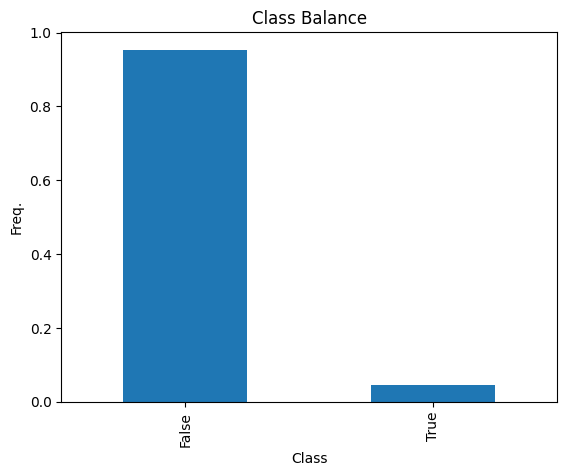

In [29]:
df["bankrupt"].value_counts(normalize=True).plot(kind="bar", title="Class Balance")
plt.xlabel("Class")
plt.ylabel("Freq.")

Oww, that's seem a imbalanced data and That's a good news for Poland's economy! Since it looks like most of the companies in our dataset are doing all right for themselves.

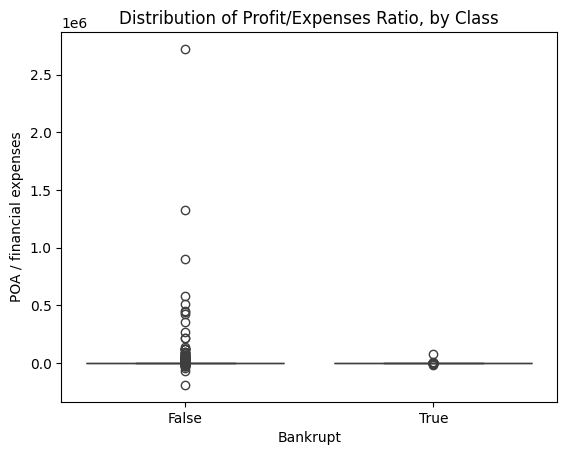

In [31]:
# create a boxplot
sns.boxplot(x="bankrupt", y="feat_27", data=df)
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Class");

Boxplot's are meant to show  quartiles in dataset but this one is not doing great, so let's further investigate into Attr27..

In [35]:
df["feat_27"].describe().apply("{0:,.0f}".format)

count        9,312
mean         1,206
std         35,477
min       -190,130
25%              0
50%              1
75%              5
max      2,723,000
Name: feat_27, dtype: object

Note that the median is around 1, but the mean is over 1000. That suggests that this feature is skewed to the right. Let's make a histogram to see what the distribution actually looks like.

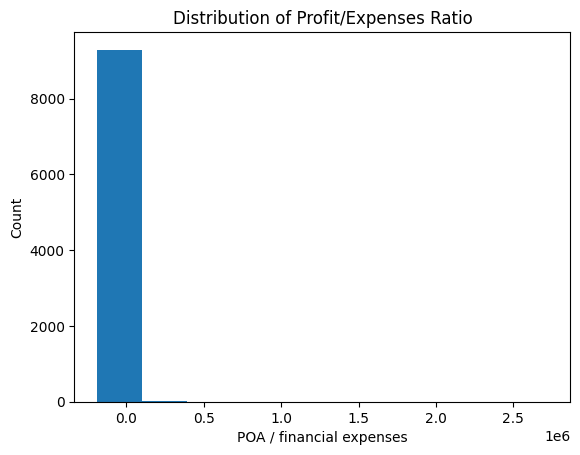

In [36]:
plt.hist(df["feat_27"])
plt.xlabel("POA / financial expenses")
plt.ylabel("Count"),
plt.title("Distribution of Profit/Expenses Ratio");

 Aww!! The data is very skewed. So, in order to create a helpful boxplot, we need to trim the data.

In [38]:
q1, q9= df['feat_27'].quantile([0.1,0.9])
mask= df['feat_27'].between(q1,q9)

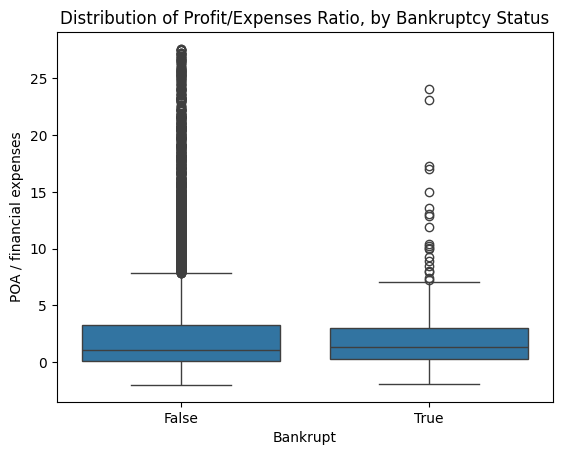

In [39]:
# Create clipped boxplot
sns.boxplot(x="bankrupt", y="feat_27", data=df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("POA / financial expenses")
plt.title("Distribution of Profit/Expenses Ratio, by Bankruptcy Status");

It's shows that companies that have high profit/expense ratio seems to be safer side, Let's explore some other features also....

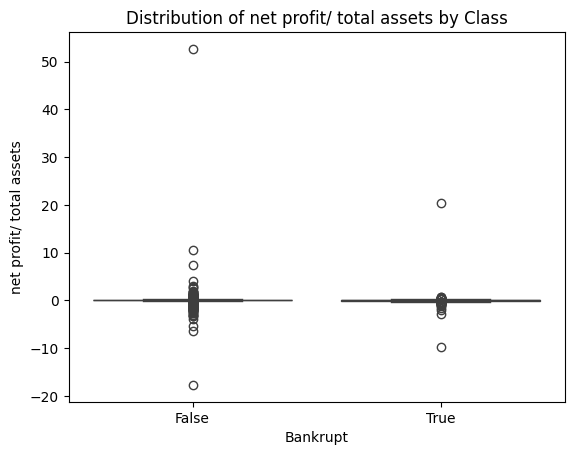

In [42]:
sns.boxplot(x="bankrupt", y="feat_1", data= df)
plt.xlabel("Bankrupt")
plt.ylabel("net profit/ total assets")
plt.title("Distribution of net profit/ total assets by Class");

In [43]:
df["feat_1"].describe()

count    9977.000000
mean        0.052688
std         0.662816
min       -17.692000
25%         0.000700
50%         0.042731
75%         0.123140
max        52.652000
Name: feat_1, dtype: float64

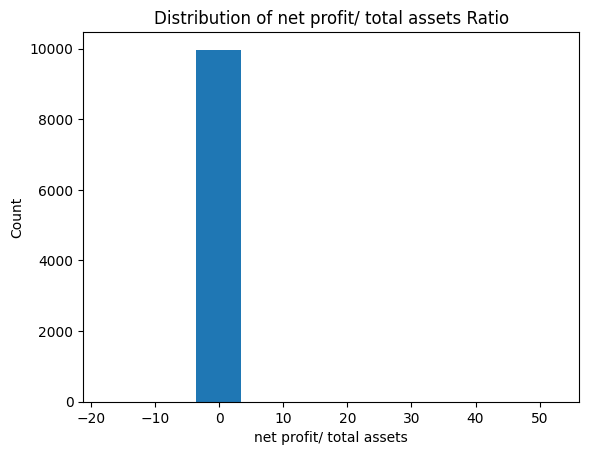

In [45]:
# Plot histogram of `feat_1`
plt.hist(df["feat_1"])
plt.xlabel("net profit/ total assets")
plt.ylabel("Count"),
plt.title("Distribution of net profit/ total assets Ratio");

In [46]:
q1, q9= df["feat_1"].quantile([0.1,0.9])
mask= df["feat_1"].between(q1,q9)

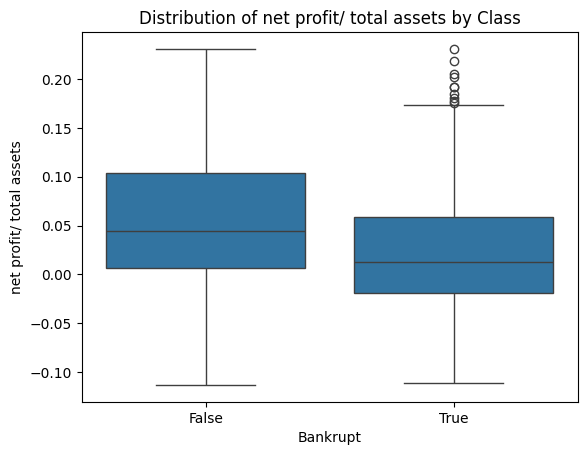

In [47]:
# Explore another feature
sns.boxplot(x="bankrupt", y="feat_1", data= df[mask])
plt.xlabel("Bankrupt")
plt.ylabel("net profit/ total assets")
plt.title("Distribution of net profit/ total assets by Class");

<Axes: >

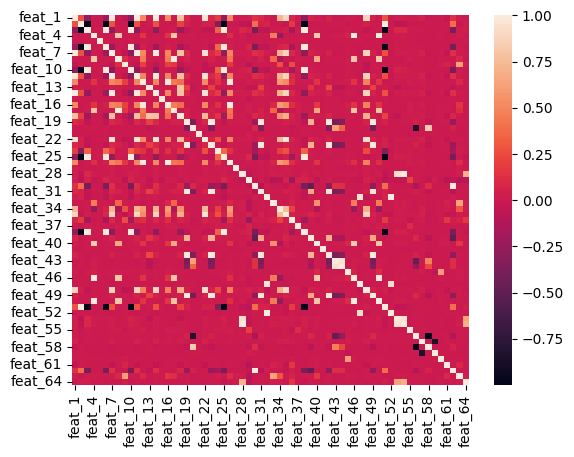

In [49]:
corr = df.drop(columns="bankrupt").corr()
sns.heatmap(corr)

conclusion of eda: First, our data is imbalanced. This is something we need to address in our data preparation. Second, many of our features have missing values that we'll need to impute. And since the features are highly skewed, the best imputation strategy is likely median, not mean. Finally, we have autocorrelation issues, which means that we should steer clear of linear models, and try a tree-based model instead.

## Split

In [50]:
target = "bankrupt"
X = df.drop(columns=target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (9977, 64)
y shape: (9977,)


n order to make sure that our model can generalize, we need to put aside a test set that we'll use to evaluate our model once it's trained.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7981, 64)
y_train shape: (7981,)
X_test shape: (1996, 64)
y_test shape: (1996,)


## Resample
let's handle data imbalance problem:

Now that we've split our data into training and validation sets, we can address the class imbalance we saw during our EDA. One strategy is to resample the training data. There are many to do this, so let's start with under-sampling.

In [52]:
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print(X_train_under.shape)
X_train_under.head()

(750, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
company_id,,,,,,,,,,,,,,,,,,,,,
9894,0.15004,0.69216,0.109950,1.15880,-4.9687,0.00000,0.19268,0.44476,3.0187,0.30784,...,303.780,0.066285,0.48738,0.93842,0.00000,449.920,4.6182,83.691,4.3613,15.2540
7527,0.24587,0.43150,0.082816,1.46460,-32.6170,0.26818,0.24587,1.31750,4.3309,0.56850,...,339.010,0.061343,0.43249,0.94401,0.44548,49.830,28.1510,15.023,24.2970,5.8611
2201,0.34101,0.86272,0.064732,1.08470,-16.5710,0.00000,0.34101,0.15913,2.8198,0.13728,...,64.243,0.123460,2.48400,0.88056,0.71766,16.975,6.3669,98.918,3.6899,16.4830
3480,-0.18936,1.58310,-0.826740,0.47779,-129.4600,-1.17370,-0.18936,-0.36834,2.4441,-0.58314,...,-141.520,-0.104460,0.32472,1.07420,0.00000,19.305,4.0934,236.430,1.5438,10.0330
7438,0.48920,0.12948,0.660240,6.09910,445.2600,0.00000,0.48920,6.72320,2.4824,0.87052,...,1197.300,0.196370,0.56196,0.80601,0.00000,30.816,14.3070,19.038,19.1720,11.8050


let's do oversampling also

In [53]:
over_sampler = RandomOverSampler(random_state=True)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(15212, 64)


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64
0,0.025295,0.18186,0.25549,2.8331,27.8900,0.027146,0.031512,4.4988,0.80988,0.81814,...,2.8331,0.168580,0.000000,0.83160,0.051924,4.6349,4.3152,62.815,5.8107,1.3383
1,0.036535,0.23970,0.28620,2.4247,108.5600,0.172270,0.044530,2.9906,0.99870,0.71685,...,11061.0000,-0.001297,0.050966,1.00130,0.054142,8.6335,2.8443,99.347,3.6740,1.4390
2,0.125410,0.18814,0.30102,2.6450,70.2050,0.356550,0.158410,4.2155,1.12060,0.79308,...,2883.3000,0.107630,0.158130,0.89237,0.006486,26.6100,5.2971,45.791,7.9710,2.8269
3,0.084535,0.20098,0.67518,4.3595,176.9500,0.343760,0.097064,3.1888,1.07030,0.64088,...,18472.0000,0.065664,0.131900,0.93434,0.000000,35.4340,2.5728,61.047,5.9790,9.7029
4,0.008914,0.40809,0.23185,1.8474,-5.4762,0.000000,0.008914,1.4504,1.20330,0.59191,...,357.9100,0.272140,0.015060,0.72876,0.203190,5.0776,4.6286,82.985,4.3984,2.4331


<Axes: xlabel='bankrupt'>

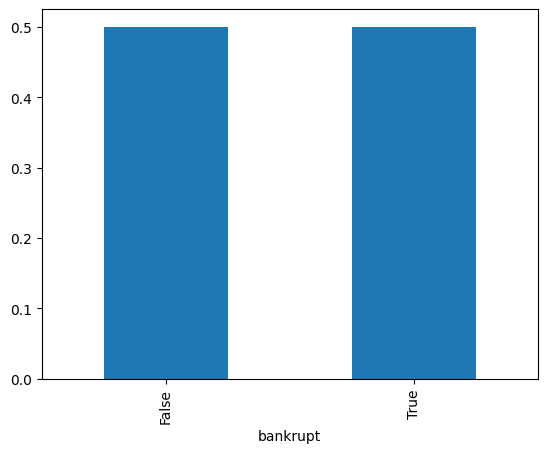

In [54]:
y_train_over.value_counts(normalize=True).plot(kind='bar')

Now, our data is balanced

# Build Model

## Baseline

In [55]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.953


Note here that, because our classes are imbalanced, the baseline accuracy is very high. We should keep this in mind because, even if our trained model gets a high validation accuracy score, that doesn't mean it's actually good.

## Iterate

Now that we have a baseline, let's build a model to see if we can beat it.

let's create three identical models: model_reg, model_under and model_over. All of them will use a SimpleImputer followed by a DecisionTreeClassifier. Train model_reg using the unaltered training data. For model_under, using the undersampled data. For model_over, using the oversampled data.

In [56]:
# Fit on `X_train`, `y_train`
model_reg = make_pipeline(SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42))
model_reg.fit(X_train, y_train)

# Fit on `X_train_under`, `y_train_under`
model_under = make_pipeline(SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42))
model_under.fit(X_train_under,y_train_under)

# Fit on `X_train_over`, `y_train_over`
model_over = make_pipeline(SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42))
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

## Evaluate

In [57]:
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)
    acc_test = m.score(X_test, y_test)

    print("Training Accuracy:", round(acc_train, 4))
    print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9349
Training Accuracy: 0.6975
Test Accuracy: 0.6673
Training Accuracy: 1.0
Test Accuracy: 0.9379


As we mentioned earlier, "good" accuracy scores don't tell us much about the model's performance when dealing with imbalanced data. So instead of looking at what the model got right or wrong, let's see how its predictions differ for the two classes in the dataset.

model_under test accuracy is very low, so let's stick with model_over..

let's plot a confusion matrix that shows how our best model performs on our validation set.

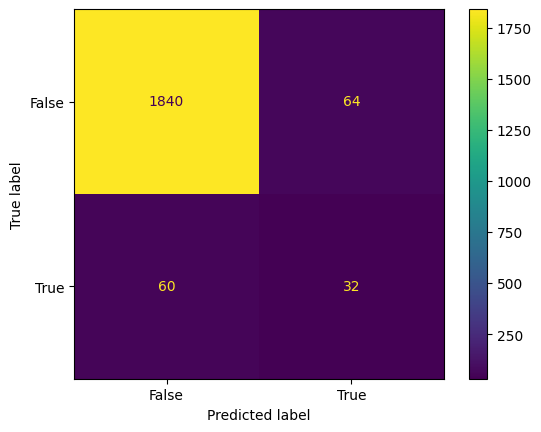

In [58]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_over, X_test, y_test);

In [59]:
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

34


## Hyperparameter tuning

In [62]:
cv_acc_scores = cross_val_score(model_over, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.97995399 0.9786395  0.98257725 0.9799474  0.9852071 ]


Now that we have an idea of how cross-validation works, let's tune our model. The first step is creating a range of hyperparameters that we want to evaluate.

let's create a dictionary with the range of hyperparameters that we want to evaluate for our classifier.

For the SimpleImputer, try both the "mean" and "median" strategies.
For the DecisionTreeclassifier, try max_depth settings between 2 and 12, by steps of 2.

In [67]:
params = {
    "simpleimputer__strategy":["mean","median"],
    "decisiontreeclassifier__max_depth":range(2,12,2)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'decisiontreeclassifier__max_depth': range(2, 12, 2)}

let's create a GridSearchCV named model that includes our classifier and hyperparameter grid.

In [68]:
model= GridSearchCV(model_over, param_grid=params, cv=5, n_jobs=-1, verbose=3)

In [69]:
# Train model
model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': range(2, 12, 2),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=3)

Let's extract the cross-validation results from model

In [70]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__max_depth,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.653604,0.026198,0.020186,0.007645,2,mean,"{'decisiontreeclassifier__max_depth': 2, 'simp...",0.689780,0.687151,0.684747,0.672584,0.692636,0.685380,0.006918,9
1,0.824067,0.018218,0.014868,0.001706,2,median,"{'decisiontreeclassifier__max_depth': 2, 'simp...",0.678935,0.678935,0.680473,0.658777,0.687048,0.676834,0.009513,10
2,1.033895,0.019546,0.014742,0.001761,4,mean,"{'decisiontreeclassifier__max_depth': 4, 'simp...",0.788038,0.793953,0.790927,0.779421,0.785996,0.787667,0.004921,7
3,1.189949,0.007667,0.012419,0.001756,4,median,"{'decisiontreeclassifier__max_depth': 4, 'simp...",0.790010,0.781466,0.780736,0.769231,0.797502,0.783789,0.009523,8
4,1.427009,0.021945,0.013231,0.002375,6,mean,"{'decisiontreeclassifier__max_depth': 6, 'simp...",0.844890,0.848176,0.848126,0.837607,0.835963,0.842952,0.005201,5
5,1.543320,0.063507,0.013429,0.001972,6,median,"{'decisiontreeclassifier__max_depth': 6, 'simp...",0.820900,0.849162,0.842867,0.823471,0.844181,0.836116,0.011595,6
6,1.682954,0.026514,0.012808,0.001522,8,mean,"{'decisiontreeclassifier__max_depth': 8, 'simp...",0.892869,0.899441,0.875740,0.878369,0.896121,0.888508,0.009616,4
7,1.715409,0.081513,0.015458,0.004380,8,median,"{'decisiontreeclassifier__max_depth': 8, 'simp...",0.885311,0.892212,0.891847,0.898093,0.902367,0.893966,0.005833,3
8,1.751899,0.030965,0.013661,0.001484,10,mean,"{'decisiontreeclassifier__max_depth': 10, 'sim...",0.921788,0.938219,0.915516,0.919132,0.926693,0.924270,0.007869,2
9,1.707902,0.177041,0.010255,0.001394,10,median,"{'decisiontreeclassifier__max_depth': 10, 'sim...",0.917187,0.925731,0.937212,0.930966,0.936226,0.929465,0.007385,1


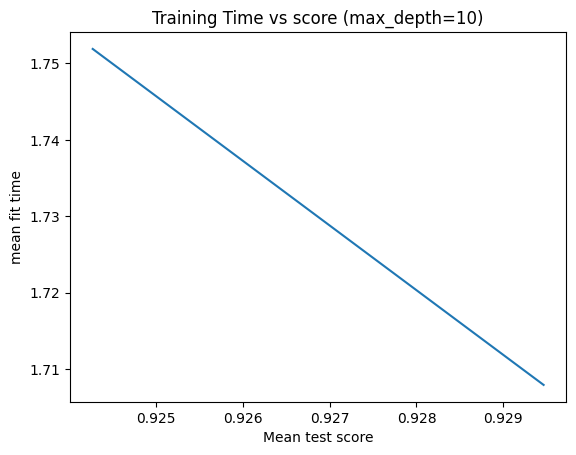

In [75]:
# Create mask
mask = cv_results["param_decisiontreeclassifier__max_depth"]==10
# Plot fit time vs n_estimators
plt.plot(cv_results[mask]["mean_test_score"], cv_results[mask]["mean_fit_time"])
# Label axes
plt.ylabel("mean fit time")
plt.xlabel("Mean test score")
plt.title("Training Time vs score (max_depth=10)");

let's xtract the best hyperparameters from model.

In [76]:
# Extract best hyperparameters
model.best_params_

{'decisiontreeclassifier__max_depth': 10, 'simpleimputer__strategy': 'median'}

In [77]:
model.best_score_

0.9294646339136847

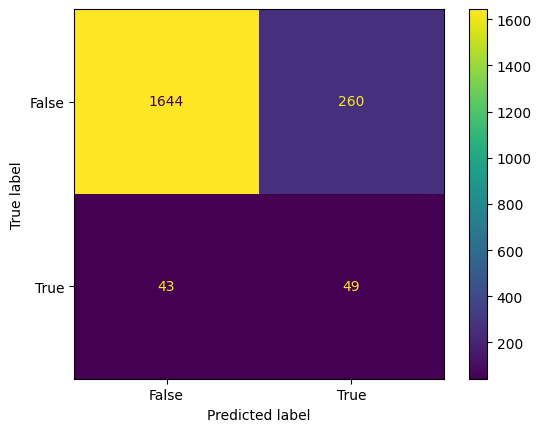

In [78]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

After hyper-parameter tuning we can see that our "False Negative"(Type-2 error) predictions is decreased(from 60 to 43) which is desirable in our case..

Now, let's try a ensemble learning based model..

# RandomForestClassifier:

## Build Model

### Iterate

In [80]:
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=True))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=True))])


In [81]:
cv_acc_scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, n_jobs=-1)
print(cv_acc_scores)

[0.99638515 0.99802826 0.99802761 0.99671269 0.99835634]


In [82]:
params = {
    "simpleimputer__strategy":["mean","median"],
    "randomforestclassifier__n_estimators":range(25,100,25),
    "randomforestclassifier__max_depth":range(10,50,10)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

In [83]:
forest_model = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)

In [85]:
# Train model
forest_model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=True))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [86]:
cv_results = pd.DataFrame(forest_model.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.358508,0.444400,0.049923,0.005951,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.978640,0.981597,0.978961,0.968771,0.971072,0.975808,0.004969,21
1,5.499711,0.513882,0.041123,0.005660,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.974696,0.976668,0.976331,0.968113,0.971400,0.973442,0.003252,24
2,10.393035,0.807520,0.079922,0.016814,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.979625,0.981926,0.981920,0.970743,0.980276,0.978898,0.004177,19
3,10.690660,0.760172,0.071218,0.012357,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.972067,0.977982,0.979290,0.971072,0.973373,0.974757,0.003277,22
4,18.088069,1.380201,0.094242,0.012145,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.977982,0.979625,0.981591,0.972387,0.981262,0.978570,0.003349,20
5,16.066032,0.690514,0.089400,0.010025,10,75,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973710,0.976996,0.979290,0.969099,0.974030,0.974625,0.003438,23
6,6.518897,0.603231,0.060686,0.017320,20,25,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.994742,0.997700,0.996713,0.995069,0.997699,0.996384,0.001264,17
7,6.610725,0.742926,0.057658,0.020272,20,25,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.993099,0.997042,0.997041,0.996055,0.997370,0.996122,0.001574,18
8,12.183200,1.152544,0.067957,0.008496,20,50,mean,"{'randomforestclassifier__max_depth': 20, 'ran...",0.996057,0.998028,0.996384,0.995069,0.997370,0.996582,0.001031,16
9,12.553157,0.777164,0.078034,0.010530,20,50,median,"{'randomforestclassifier__max_depth': 20, 'ran...",0.994085,0.997371,0.997699,0.997699,0.998685,0.997108,0.001574,13


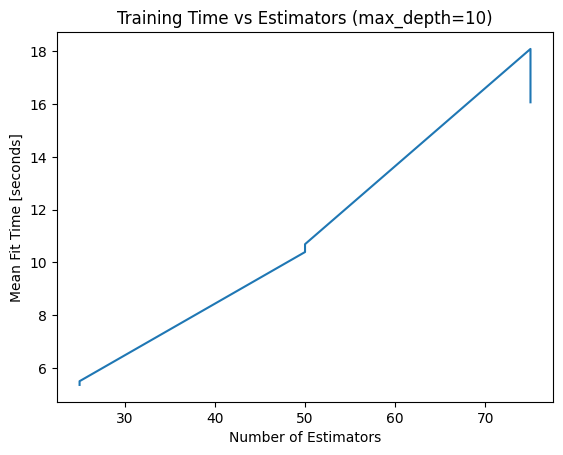

In [87]:
# Create mask
mask = cv_results["param_randomforestclassifier__max_depth"]==10
# Plot fit time vs n_estimators
plt.plot(cv_results[mask]["param_randomforestclassifier__n_estimators"], cv_results[mask]["mean_fit_time"])
# Label axes
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Estimators (max_depth=10)");

In [88]:
# Extract best hyperparameters
forest_model.best_params_


{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'median'}

In [89]:
# Extract best score
forest_model.best_score_

0.9977650606483488

In [90]:
forest_model.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, n_estimators=50,
                                        random_state=True))])

### Evaluate:

In [91]:
acc_train = forest_model.score(X_train_over, y_train_over)
acc_test = forest_model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.9569


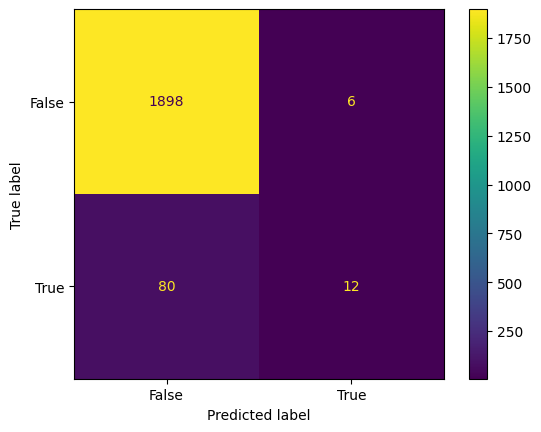

In [92]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(forest_model, X_test, y_test)

Again this model test accuracy is good but not performing good with classification(because FalseNegative 80>60>43)

# GradientBoostingClassifier:

## Build

### Iterate

In [96]:
gbc= make_pipeline(SimpleImputer(), GradientBoostingClassifier())

In [97]:
params = {
    "simpleimputer__strategy":["mean", "median"],
    "gradientboostingclassifier__n_estimators":range(20,31,5),
    "gradientboostingclassifier__max_depth":range(2,5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

In [101]:
gdb_model = GridSearchCV(gbc, param_grid=params, cv=5, verbose=1, n_jobs=-1)

In [102]:
# Fit model to over-sampled training data
gdb_model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

In [103]:
results = pd.DataFrame(gdb_model.cv_results_)
results.sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,31.987037,0.902272,0.016943,0.002077,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.918501,0.917844,0.923734,0.909270,0.920776,0.918025,0.004839,1
17,27.793562,2.150420,0.015153,0.001515,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.905685,0.907328,0.916174,0.904339,0.913544,0.909414,0.004621,2
14,28.256089,1.628280,0.029419,0.017133,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.907986,0.905685,0.905654,0.896121,0.901381,0.903365,0.004204,3
15,27.757912,1.404977,0.018441,0.002505,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.891883,0.890569,0.902038,0.891190,0.898751,0.894886,0.004635,4
12,21.822661,1.000339,0.016296,0.001765,4,20,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.897141,0.890897,0.901052,0.886259,0.895135,0.894097,0.005107,5
13,21.865957,0.648098,0.016917,0.002153,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.872166,0.875780,0.896450,0.875740,0.884287,0.880884,0.008745,6
10,26.183416,1.940354,0.017397,0.000200,3,30,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.878081,0.880381,0.880671,0.869822,0.879684,0.877728,0.004053,7
8,20.948735,1.651271,0.026606,0.020262,3,25,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.862636,0.876438,0.864892,0.859303,0.871795,0.867013,0.006242,8
11,26.962623,2.786876,0.026149,0.017539,3,30,median,"{'gradientboostingclassifier__max_depth': 3, '...",0.853763,0.861321,0.872124,0.854701,0.869494,0.862280,0.007481,9
6,16.032461,1.150606,0.018142,0.001929,3,20,mean,"{'gradientboostingclassifier__max_depth': 3, '...",0.855077,0.859349,0.854701,0.847469,0.854701,0.854259,0.003823,10


In [104]:
# Extract best hyperparameters
gdb_model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

In [105]:
acc_train = gdb_model.score(X_train, y_train)
acc_test = gdb_model.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 4))
print("Validation Accuracy:", round(acc_test, 4))

Training Accuracy: 0.9138
Validation Accuracy: 0.8988


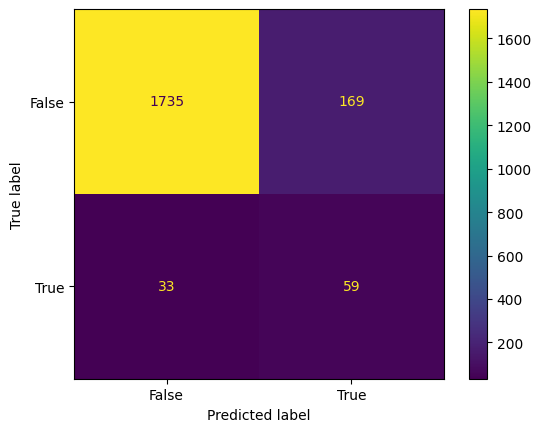

In [106]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(gdb_model, X_test, y_test)

In [110]:
# Print classification report
print(classification_report(y_test, gdb_model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.98      0.91      0.94      1904
        True       0.26      0.64      0.37        92

    accuracy                           0.90      1996
   macro avg       0.62      0.78      0.66      1996
weighted avg       0.95      0.90      0.92      1996



This model is doing great and it's predicting "False" less time when it's actually "True".

# Communicate

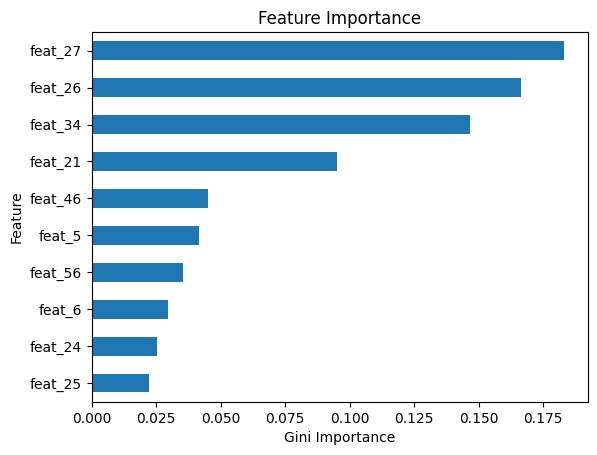

In [113]:
# Get feature names from training data
features = X_train_over.columns
# Extract importances from model
importances = gdb_model.best_estimator_.named_steps["gradientboostingclassifier"].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [112]:
# Save model
with open("model.pkl", "wb") as f:
    pickle.dump(gdb_model, f)

In [119]:
def make_predictions(data_filepath, model_filepath):
    # Wrangle JSON file
    X_test = pd.read_csv(data_filepath, index_col="company_id")
    with open(model_filepath, "rb") as f:
        model= pickle.load(f)
    # Generate predictions
    y_test_pred = model.predict(X_test)
    # Put predictions into Series with name "bankrupt", and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="bankrupt")
    return y_test_pred

In [120]:
y_test_pred = make_predictions(
    data_filepath="Test_data.csv",
    model_filepath="model.pkl",
)

print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (526,)


company_id
4     False
32    False
34    False
36    False
40     True
Name: bankrupt, dtype: bool